# Indicadores de desempenho

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

plt.style.use('seaborn')

**Dados:**

In [2]:
ROOT_DIR = os.getcwd().replace('src', '')

**Listagem dos setores econômicos**

In [3]:
novo_mercado = pd.read_csv(os.path.join(ROOT_DIR, 'data', 'sample_market-2022-09-15.csv'))
novo_mercado.head()

,Nome Do Pregão,Código,Denominação Social,Segmento De Mercado,Tipo De Capital,Capital R$,Aprovado Em,Qtde Ações Ordinárias,Qtde Ações Preferenciais,Qtde Total De Ações,CNPJ,Código CVM,Ticker,Atividade Principal,Setor Econômico,Subsetor Econômico,Segmento Econômico,Site,Url
0,ATMASA,ATMP,ATMA PARTICIPAÇÕES S.A.,NOVO MERCADO,Homologado,1.419403e+09,15/12/2021,26710356,0,26710356,04.032.433/0001-80,19100,ATMP3.SA,A ATMA Participações S.A. tem como objeto soci...,Bens Industriais,Serviços,Serviços Diversos,www.liq.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
1,CCR SA,CCRO,CCR S.A.,NOVO MERCADO,Homologado,6.126100e+09,09/02/2017,2020000000,0,2020000000,02.846.056/0001-97,18821,CCRO3.SA,Prestadora de serviços públicos por meio de co...,Bens Industriais,Transporte,Exploração de Rodovias,www.ccr.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
2,ECORODOVIAS,ECOR,ECORODOVIAS INFRAESTRUTURA E LOGÍSTICA S.A.,NOVO MERCADO,Homologado,2.101489e+09,23/06/2021,696334224,0,696334224,04.149.454/0001-80,19453,ECOR3.SA,Exploração direta ou indireta de negócios de c...,Bens Industriais,Transporte,Exploração de Rodovias,www.ecorodovias.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
3,EMBRAER,EMBR,EMBRAER S.A.,NOVO MERCADO,Homologado,5.159617e+09,05/03/2018,740465044,0,740465044,07.689.002/0001-89,20087,EMBR3.SA,Projeto. desenvolvimento. fabricação. comercia...,Bens Industriais,Material de Transporte,Material Aeronáutico e de Defesa,www.embraer.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
4,ETERNIT,ETER,ETERNIT S.A.,NOVO MERCADO,Homologado,4.380815e+08,29/09/2021,61776575,0,61776575,61.092.037/0001-81,5762,ETER3.SA,Industrialização e comercialização de produtos...,Bens Industriais,Construção e Engenharia,Produtos para Construção,www.eternit.com.br/ri,https://sistemaswebb3-listados.b3.com.br/liste...


In [4]:
setores = novo_mercado['Setor Econômico'].drop_duplicates().to_list()
setores

['Bens Industriais',
 'Comunicações',
 'Consumo Cíclico',
 'Consumo não Cíclico',
 'Financeiro',
 'Materiais Básicos',
 'Petróleo. Gás e Biocombustíveis',
 'Saúde',
 'Tecnologia da Informação',
 'Utilidade Pública']

**Demonstrações Financeiras**

In [5]:
dfcs_nomes = ['BPA_con', 'BPP_con', 'DRE_con']
dfcs = pd.DataFrame()
for nome in dfcs_nomes:
    for tipo in ['itr', 'dfp']:
        tmp = pd.read_csv(os.path.join(ROOT_DIR, 'data', 'dfcs', f'{tipo}_cia_aberta_{nome}_2017-2021.csv'))
        dfcs = pd.concat([dfcs, tmp])
    
dfcs = dfcs[dfcs['ORDEM_EXERC']=='ÚLTIMO']
dfcs = dfcs[['DT_REFER', 'DENOM_CIA', 'CNPJ_CIA', 'CD_CVM', 'CD_CONTA', 'DS_CONTA', 'VL_CONTA']]
dfcs['DT_REFER'] = pd.to_datetime(dfcs['DT_REFER'])
dfcs = dfcs[dfcs['CD_CONTA'].apply(lambda x: len(x) <= 10)]
dfcs.reset_index(drop=True, inplace=True)
dfcs = dfcs.sort_values(['DENOM_CIA', 'DT_REFER'])
dfcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204819 entries, 251943 to 1195523
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   DT_REFER   1204819 non-null  datetime64[ns]
 1   DENOM_CIA  1204819 non-null  object        
 2   CNPJ_CIA   1204819 non-null  object        
 3   CD_CVM     1204819 non-null  int64         
 4   CD_CONTA   1204819 non-null  object        
 5   DS_CONTA   1204819 non-null  object        
 6   VL_CONTA   1204819 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 73.5+ MB


In [6]:
dfcs.head()

,DT_REFER,DENOM_CIA,CNPJ_CIA,CD_CVM,CD_CONTA,DS_CONTA,VL_CONTA
251943,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1,Ativo Total,424330.0
251944,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1.01,Ativo Circulante,286849.0
251945,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1.01.01,Caixa e Equivalentes de Caixa,11588.0
251946,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1.01.02,Aplicações Financeiras,0.0
251947,2019-12-31,2W ENERGIA S.A.,08.773.135/0001-00,25224,1.01.02.01,Aplicações Financeiras Avaliadas a Valor Justo...,0.0


In [7]:
dfcs.tail()

,DT_REFER,DENOM_CIA,CNPJ_CIA,CD_CVM,CD_CONTA,DS_CONTA,VL_CONTA
1195519,2021-12-31,ZAMP SA,13.574.594/0001-96,24317,3.99,Lucro por Ação - (Reais / Ação),0.00000
1195520,2021-12-31,ZAMP SA,13.574.594/0001-96,24317,3.99.01,Lucro Básico por Ação,0.00000
1195521,2021-12-31,ZAMP SA,13.574.594/0001-96,24317,3.99.01.01,ON,-0.99893
1195522,2021-12-31,ZAMP SA,13.574.594/0001-96,24317,3.99.02,Lucro Diluído por Ação,0.00000
1195523,2021-12-31,ZAMP SA,13.574.594/0001-96,24317,3.99.02.01,ON,-0.99893


## Indicadores de Liquidez

* Liquidez Corrente: $$LC = \dfrac{AC}{PC}$$

* Liquidez Seca: $$LS = \dfrac{AC - E - DA}{PC}$$

* Liquidez Imediata: $$LI = \dfrac{D}{PC}$$

* Liquidez Geral: $$LG = \dfrac{AC + RLP}{PC + ELP}$$

In [8]:
def calcula_liquidez(x):
    AC = x[x['CD_CONTA']=='1.01'].iloc[0]['VL_CONTA'] # Ativo Circulante
    E = x[x['CD_CONTA']=='1.01.04'].iloc[0]['VL_CONTA'] # Estoques
    DA = x[x['CD_CONTA']=='1.01.07'].iloc[0]['VL_CONTA'] # Despesas Antecipadas
    D = x[x['CD_CONTA']=='1.01.01'].iloc[0]['VL_CONTA'] + x[x['CD_CONTA']=='1.01.02'].iloc[0]['VL_CONTA'] # Caixa e equivalente de caixa + Aplic. Financeiras
    RLP = x[x['CD_CONTA']=='1.01'].iloc[0]['VL_CONTA'] + x[x['CD_CONTA']=='1.02.01'].iloc[0]['VL_CONTA'] # Ativo Circulante + Realizável a Longo Prazo
    PC = x[x['CD_CONTA']=='2.01'].iloc[0]['VL_CONTA']
    ELP = x[x['CD_CONTA']=='2.01'].iloc[0]['VL_CONTA'] +  x[x['CD_CONTA']=='2.02'].iloc[0]['VL_CONTA']
    LC = AC/PC
    LS = (AC - E - DA) / PC
    LI = D / PC
    LG = (AC + RLP) / (PC + ELP)
    return pd.Series([LC, LS, LI, LG], index=['Corrente', 'Seca', 'Imediata', 'Geral'])

In [11]:
def lista_setores():
    setores_dict = {}
    for setor_nome in novo_mercado['Setor Econômico'].drop_duplicates().to_list():
        setor_df = novo_mercado[novo_mercado['Setor Econômico']==setor_nome]\
            .sort_values(by=['Capital R$'], ascending=False)\
            .reset_index(drop=True)
        setor_df['Peso Capital Social'] = setor_df['Capital R$'] / setor_df['Capital R$'].sum()
        
        setores_dict[setor_nome] = setor_df[['Denominação Social', 'Código CVM', 'Ticker', 'Capital R$', 'Peso Capital Social']]
        
    return setores_dict

In [12]:
setores = lista_setores()

## Bens Industriais

In [13]:
setor = setores['Bens Industriais']

In [14]:
setor

,Denominação Social,Código CVM,Ticker,Capital R$,Peso Capital Social
0,RUMO S.A.,17450,RAIL3.SA,1.254784e+10,0.291848
1,WEG S.A.,5410,WEGE3.SA,6.504517e+09,0.151287
2,CCR S.A.,18821,CCRO3.SA,6.126100e+09,0.142486
3,EMBRAER S.A.,20087,EMBR3.SA,5.159617e+09,0.120006
4,ECORODOVIAS INFRAESTRUTURA E LOGÍSTICA S.A.,19453,ECOR3.SA,2.101489e+09,0.048878
5,SANTOS BRASIL PARTICIPACOES S.A.,17892,STBP3.SA,1.873906e+09,0.043585
6,ATMA PARTICIPAÇÕES S.A.,19100,ATMP3.SA,1.419403e+09,0.033014
7,LOG-IN LOGISTICA INTERMODAL S.A.,20710,LOGN3.SA,1.342833e+09,0.031233
8,MILLS ESTRUTURAS E SERVIÇOS DE ENGENHARIA S.A.,22012,MILS3.SA,1.091105e+09,0.025378
9,TUPY S.A.,6343,TUPY3.SA,1.060301e+09,0.024661


In [15]:
liquidez_empresas = {}
erros = []
for cd_cvm in setor['Código CVM'].to_list():
    try:
        empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
        empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
        liquidez = empresa.groupby('DT_REFER').apply(calcula_liquidez)
        liquidez_empresas[cd_cvm] = liquidez
    except:
        liquidez_empresas[cd_cvm] = pd.DataFrame()
        erros.append(cd_cvm)

In [16]:
liquidez_setorial = pd.DataFrame()
for cd_cvm, liquidez in liquidez_empresas.items():
    peso = setor[setor['Código CVM']==cd_cvm]['Peso Capital Social'].reset_index(drop=True)
    peso = peso[0]
    liquidez_setorial = liquidez_setorial.add(peso * liquidez, fill_value=0)
    
liquidez_setorial

,Corrente,Seca,Imediata,Geral
DT_REFER,,,,
2017-03-31,1.552670,1.288896,0.852540,0.923830
2017-06-30,1.439949,1.188255,0.756364,0.887028
2017-09-30,1.400708,1.143514,0.715303,0.880293
2017-12-31,1.520844,1.292985,0.607579,0.902251
2018-03-31,1.741079,1.486074,0.782666,0.943203
2018-06-30,1.520751,1.262163,0.547435,0.878464
2018-09-30,1.512400,1.257427,0.552110,0.871958
2018-12-31,1.547314,1.293780,0.487298,0.874187
2019-03-31,1.424980,1.238302,0.489260,0.868878


In [17]:
liquidez_setorial = liquidez_setorial['2018-01-01':]

In [18]:
tidy = pd.melt(liquidez_setorial.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy.columns=['Data', 'Liquidez', 'Valor']
tidy

,Data,Liquidez,Valor
0,2018-03-31,Corrente,1.741079
1,2018-06-30,Corrente,1.520751
2,2018-09-30,Corrente,1.512400
3,2018-12-31,Corrente,1.547314
4,2019-03-31,Corrente,1.424980
...,...,...,...
59,2020-12-31,Geral,1.144948
60,2021-03-31,Geral,1.104167
61,2021-06-30,Geral,1.113403
62,2021-09-30,Geral,1.154392


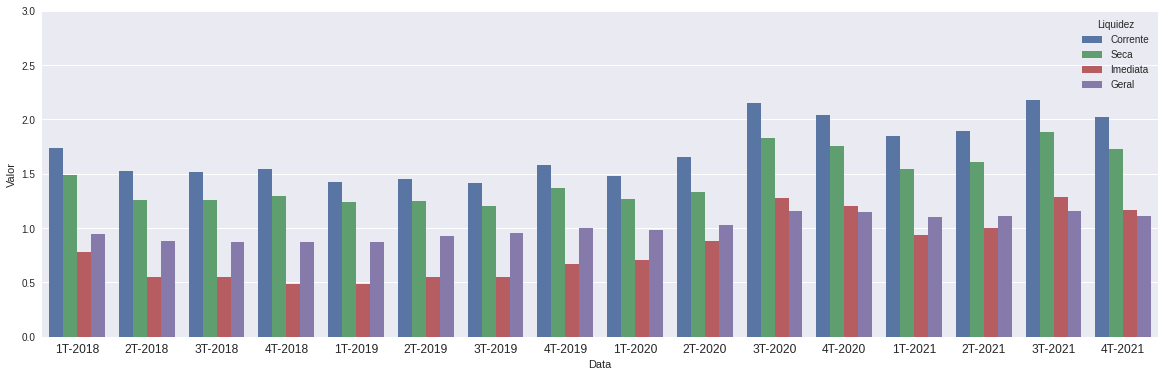

In [19]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

In [20]:
liquidez_prepandemia = liquidez_setorial[:'2020-01-01']
liquidez_pandemia = liquidez_setorial['2020-01-01':]

for liq in liquidez_setorial.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

Corrente
T Test
statistic=-4.094592681976873, pvalue=0.0010936217546956965
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=7.455882352941181, pvalue=0.006322947695810918
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Seca
T Test
statistic=-3.756880885339388, pvalue=0.0021242897681341705
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=8.040441176470594, pvalue=0.004574439456210672
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Imediata
T Test
statistic=-5.8418013750691316, pvalue=4.279567432069329e-05
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=10.599264705882355, pvalue=0.0011313264268228347
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Geral
T Test
statistic=-6.504051815595689, pvalue=1.3924854163243053e-05
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=10.599264705882355, pvalue=0.0011313264268228347
Significant

### Análise da principal empresa do setor: RUMO.S.A

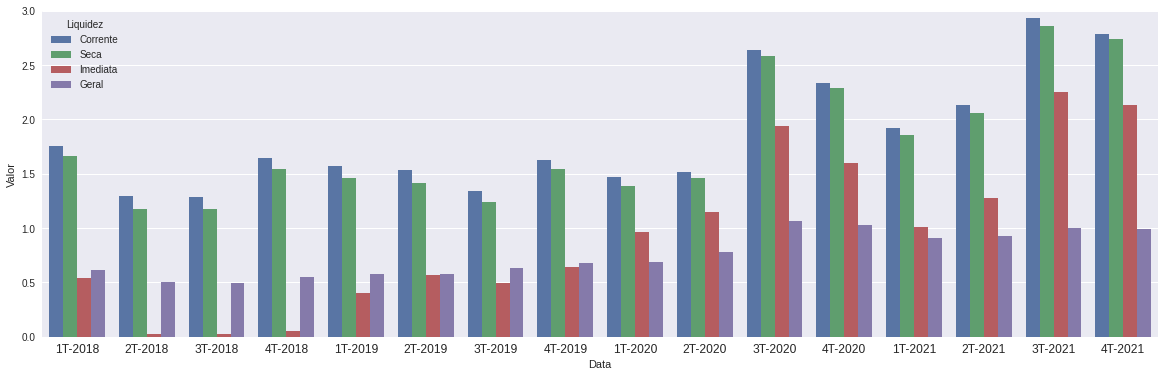

Corrente
T Test
statistic=-3.4321752783322954, pvalue=0.0040455303746361375
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=5.338235294117652, pvalue=0.020862582332765417
Significante a 5.0%
Significante a 10.0%

Seca
T Test
statistic=-3.5965074093261036, pvalue=0.0029186387495510986
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=6.352941176470594, pvalue=0.011718685599768571
Significante a 5.0%
Significante a 10.0%

Imediata
T Test
statistic=-5.830061392807184, pvalue=4.3679931350721113e-05
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=11.294117647058826, pvalue=0.000777530446940383
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Geral
T Test
statistic=-6.68969653691307, pvalue=1.027570631998872e-05
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=11.294117647058826, pvalue=0.000777530446940383
Significante a 1.0%
Significante a 5.0%
Significante 

In [21]:
liq_rumo = liquidez_empresas[17450]
liq_rumo = liq_rumo['2018-01-01':]
tidy_rumo = pd.melt(liq_rumo.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy_rumo.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy_rumo, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

liquidez_prepandemia = liq_rumo[:'2020-01-01']
liquidez_pandemia = liq_rumo['2020-01-01':]

for liq in liq_rumo.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()


## Consumo Cíclico

In [22]:
setor = setores['Consumo Cíclico']
setor

,Denominação Social,Código CVM,Ticker,Capital R$,Peso Capital Social
0,AMERICANAS S.A,20990,AMER3.SA,1.538559e+10,0.139239
1,MAGAZINE LUIZA S.A.,22470,MGLU3.SA,1.255216e+10,0.113597
2,LOJAS RENNER S.A.,8133,LREN3.SA,8.987760e+09,0.081339
3,COGNA EDUCAÇÃO S.A.,17973,COGN3.SA,7.667615e+09,0.069392
4,PDG REALTY S.A. EMPREEND E PARTICIPACOES,20478,PDGR3.SA,5.346128e+09,0.048382
5,VIA S.A,6505,VIIA3.SA,5.138167e+09,0.046500
6,MRV ENGENHARIA E PARTICIPACOES S.A.,20915,MRVE3.SA,4.974770e+09,0.045021
7,LOCALIZA RENT A CAR S.A.,19739,RENT3.SA,4.000000e+09,0.036200
8,CYRELA BRAZIL REALTY S.A.EMPREEND E PART,14460,CYRE3.SA,3.395745e+09,0.030731
9,GUARARAPES CONFECCOES S.A.,4669,GUAR3.SA,3.100000e+09,0.028055


In [23]:
liquidez_empresas = {}
erros = []
for cd_cvm in setor['Código CVM'].to_list():
    try:
        empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
        empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
        liquidez = empresa.groupby('DT_REFER').apply(calcula_liquidez)
        liquidez_empresas[cd_cvm] = liquidez
    except:
        liquidez_empresas[cd_cvm] = pd.DataFrame()
        erros.append(cd_cvm)

In [24]:
liquidez_setorial = pd.DataFrame()
for cd_cvm, liquidez in liquidez_empresas.items():
    peso = setor[setor['Código CVM']==cd_cvm]['Peso Capital Social'].reset_index(drop=True)
    peso = peso[0]
    liquidez_setorial = liquidez_setorial.add(peso * liquidez, fill_value=0)
    
liquidez_setorial

,Corrente,Seca,Imediata,Geral
DT_REFER,,,,
2017-03-31,1.925610,1.358900,0.607094,1.439792
2017-06-30,1.886082,1.384239,0.663891,1.453717
2017-09-30,1.941289,1.441575,0.674375,1.511912
2017-12-31,1.914756,1.429589,0.693080,1.532905
2018-03-31,1.983770,1.454646,0.686346,1.551812
2018-06-30,2.024722,1.472676,0.685963,1.578451
2018-09-30,2.383767,1.795956,1.037626,1.612433
2018-12-31,1.959382,1.382513,0.696419,1.498672
2019-03-31,1.947611,1.376173,0.687439,1.362809


In [25]:
liquidez_setorial = liquidez_setorial['2018-01-01':]
tidy = pd.melt(liquidez_setorial.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy.columns=['Data', 'Liquidez', 'Valor']
tidy

,Data,Liquidez,Valor
0,2018-03-31,Corrente,1.983770
1,2018-06-30,Corrente,2.024722
2,2018-09-30,Corrente,2.383767
3,2018-12-31,Corrente,1.959382
4,2019-03-31,Corrente,1.947611
...,...,...,...
59,2020-12-31,Geral,1.483116
60,2021-03-31,Geral,1.411259
61,2021-06-30,Geral,1.502177
62,2021-09-30,Geral,1.456867


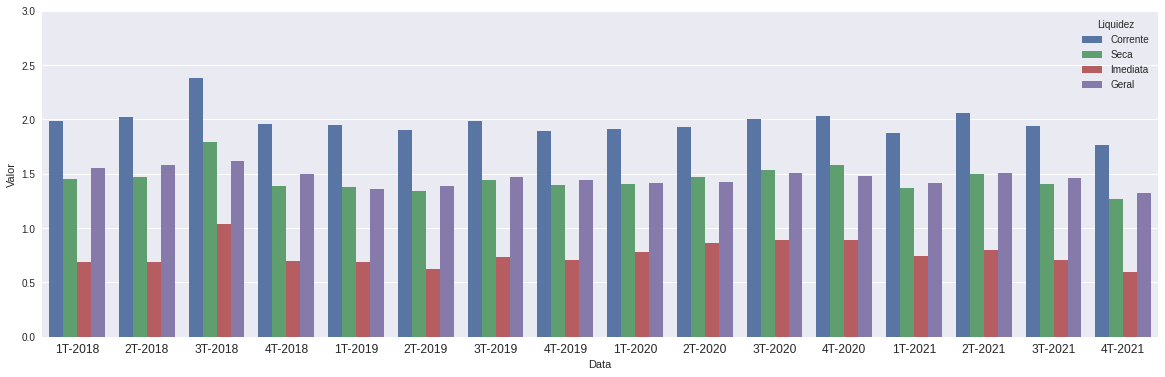

In [26]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

In [27]:
liquidez_prepandemia = liquidez_setorial[:'2020-01-01']
liquidez_pandemia = liquidez_setorial['2020-01-01':]

for liq in liquidez_setorial.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

Corrente
T Test
statistic=1.0988090980470335, pvalue=0.29038908760043947

H Test
statistic=0.397058823529413, pvalue=0.528612125255687

Seca
T Test
statistic=0.2773088775269733, pvalue=0.7855956256054524

H Test
statistic=0.17647058823529704, pvalue=0.6744240722352912

Imediata
T Test
statistic=-0.8939699088378381, pvalue=0.386448519408799

H Test
statistic=2.82352941176471, pvalue=0.09289194088370446
Significante a 10.0%

Geral
T Test
statistic=1.273446240159858, pvalue=0.22359780571512863

H Test
statistic=0.8933823529411811, pvalue=0.3445623653256964



### Análise da principal empresa do setor: AMERICANAS S.A

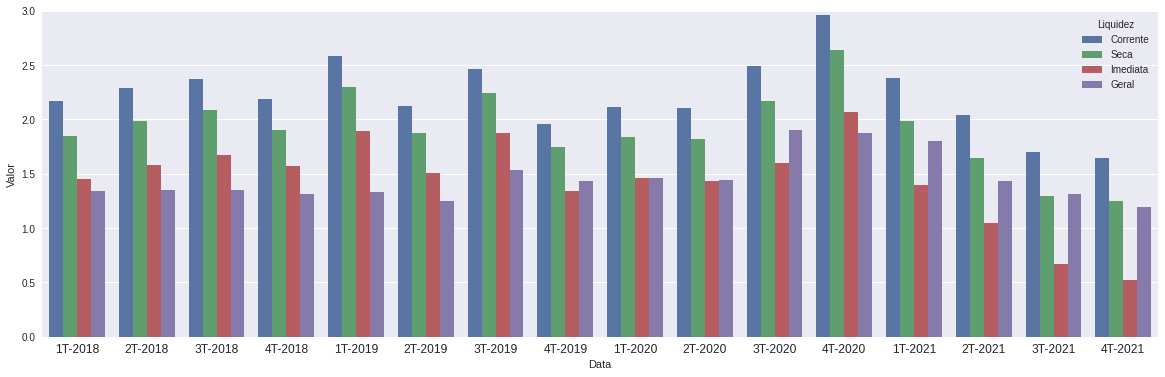

Corrente
T Test
statistic=0.5290278575350816, pvalue=0.6050731210819162

H Test
statistic=0.7058823529411811, pvalue=0.4008141693829329

Seca
T Test
statistic=0.9668955545193882, pvalue=0.3500033831667485

H Test
statistic=1.334558823529413, pvalue=0.2479958148314818

Imediata
T Test
statistic=1.7480922464217792, pvalue=0.10233268290738548

H Test
statistic=2.481617647058826, pvalue=0.11518373151505139

Geral
T Test
statistic=-1.9120061724309765, pvalue=0.07656047747016526
Significante a 10.0%

H Test
statistic=2.161764705882355, pvalue=0.141482121482789



In [28]:
liq_rumo = liquidez_empresas[20990]
liq_rumo = liq_rumo['2018-01-01':]
tidy_rumo = pd.melt(liq_rumo.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy_rumo.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy_rumo, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

liquidez_prepandemia = liq_rumo[:'2020-01-01']
liquidez_pandemia = liq_rumo['2020-01-01':]

for liq in liq_rumo.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()


## Consumo Não Cíclico

In [29]:
setor = setores['Consumo não Cíclico']
setor

,Denominação Social,Código CVM,Ticker,Capital R$,Peso Capital Social
0,JBS S.A.,20575,JBSS3.SA,2.363107e+10,0.339111
1,BRF S.A.,16292,BRFS3.SA,1.305342e+10,0.187319
2,MARFRIG GLOBAL FOODS S.A.,20788,MRFG3.SA,8.328578e+09,0.119517
3,ATACADÃO S.A.,24171,CRFB3.SA,7.660725e+09,0.109933
4,CIA BRASILEIRA DE DISTRIBUICAO,14826,PCAR3.SA,5.859640e+09,0.084087
5,SAO MARTINHO S.A.,20516,SMTO3.SA,2.681571e+09,0.038481
6,M.DIAS BRANCO S.A. IND COM DE ALIMENTOS,20338,MDIA3.SA,2.597656e+09,0.037277
7,MINERVA S.A.,20931,BEEF3.SA,1.678786e+09,0.024091
8,BRASILAGRO - CIA BRAS DE PROP AGRICOLAS,20036,AGRO3.SA,1.587985e+09,0.022788
9,SLC AGRICOLA S.A.,20745,SLCE3.SA,1.512522e+09,0.021705


In [30]:
liquidez_empresas = {}
erros = []
for cd_cvm in setor['Código CVM'].to_list():
    try:
        empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
        empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
        liquidez = empresa.groupby('DT_REFER').apply(calcula_liquidez)
        if cd_cvm==24228:
            liquidez.index = pd.Series(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', name='DT_REFER')
        liquidez_empresas[cd_cvm] = liquidez
    except:
        liquidez_empresas[cd_cvm] = pd.DataFrame()
        erros.append(cd_cvm)

In [31]:
liquidez_setorial = pd.DataFrame()
for cd_cvm, liquidez in liquidez_empresas.items():
    peso = setor[setor['Código CVM']==cd_cvm]['Peso Capital Social'].reset_index(drop=True)
    peso = peso[0]
    liquidez_setorial = liquidez_setorial.add(peso * liquidez, fill_value=0)
    
liquidez_setorial

,Corrente,Seca,Imediata,Geral
DT_REFER,,,,
2017-03-31,1.405349,1.059993,0.498993,0.990313
2017-06-30,1.434576,1.092765,0.506042,1.003493
2017-09-30,1.463349,1.092579,0.513522,1.039726
2017-12-31,1.448097,1.089258,0.474187,1.029575
2018-03-31,1.452782,1.115491,0.456715,1.049115
2018-06-30,1.535670,1.128673,0.472591,0.968773
2018-09-30,1.539904,1.092138,0.415067,0.980969
2018-12-31,1.531760,1.133557,0.444717,0.954100
2019-03-31,1.471359,1.056042,0.395622,0.923932


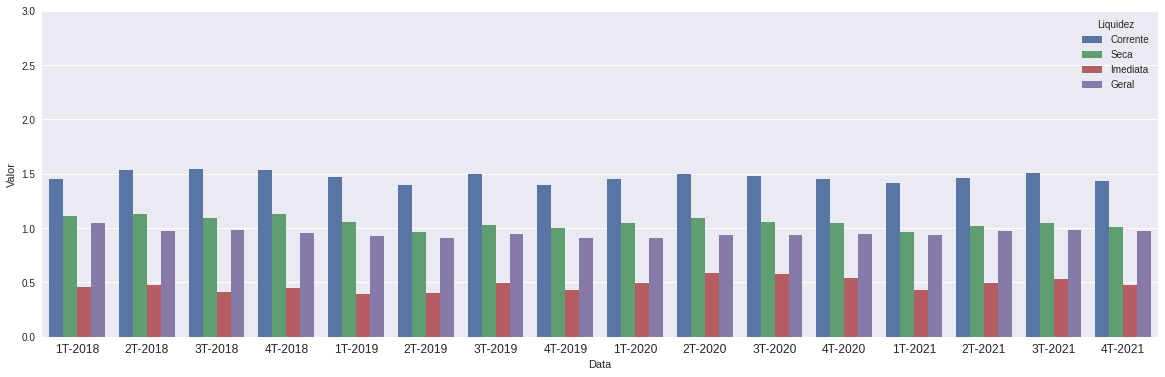

In [32]:
liquidez_setorial = liquidez_setorial['2018-01-01':]
tidy = pd.melt(liquidez_setorial.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

In [33]:
liquidez_prepandemia = liquidez_setorial[:'2020-01-01']
liquidez_pandemia = liquidez_setorial['2020-01-01':]

for liq in liquidez_setorial.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

Corrente
T Test
statistic=0.6256168400167649, pvalue=0.5416312907899457

H Test
statistic=0.7058823529411811, pvalue=0.4008141693829329

Seca
T Test
statistic=1.1508605091151949, pvalue=0.2690672951964006

H Test
statistic=1.102941176470594, pvalue=0.2936215439289016

Imediata
T Test
statistic=-3.458373085343031, pvalue=0.0038401763967870453
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=6.893382352941181, pvalue=0.008651541533947503
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Geral
T Test
statistic=0.3477594678940375, pvalue=0.7331939525570179

H Test
statistic=0.011029411764710062, pvalue=0.9163591402734728



### Análise da principal empresa do setor: JBS S.A

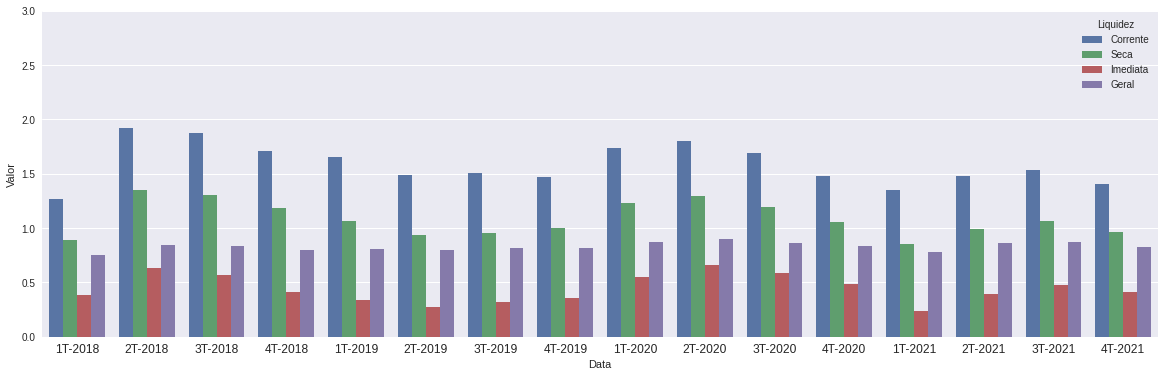

Corrente
T Test
statistic=0.5300293568583722, pvalue=0.604396649813854

H Test
statistic=0.2757352941176521, pvalue=0.5995101785599999

Seca
T Test
statistic=0.08700734657964408, pvalue=0.931897884969886

H Test
statistic=0.0, pvalue=1.0

Imediata
T Test
statistic=-0.98089118422893, pvalue=0.34329420787941023

H Test
statistic=1.334558823529413, pvalue=0.2479958148314818

Geral
T Test
statistic=-2.78002910590708, pvalue=0.014748540459068094
Significante a 5.0%
Significante a 10.0%

H Test
statistic=5.338235294117652, pvalue=0.020862582332765417
Significante a 5.0%
Significante a 10.0%



In [34]:
liq_rumo = liquidez_empresas[20575]
liq_rumo = liq_rumo['2018-01-01':]
tidy_rumo = pd.melt(liq_rumo.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy_rumo.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy_rumo, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

liquidez_prepandemia = liq_rumo[:'2020-01-01']
liquidez_pandemia = liq_rumo['2020-01-01':]

for liq in liq_rumo.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()


## Financeiro

In [35]:
setor = setores['Financeiro']
setor

,Denominação Social,Código CVM,Ticker,Capital R$,Peso Capital Social
0,"B3 S.A. - BRASIL, BOLSA, BALCÃO",21610,B3SA3.SA,1.254866e+10,0.207493
1,BR MALLS PARTICIPACOES S.A.,19909,BRML3.SA,1.040686e+10,0.172078
2,PORTO SEGURO S.A.,16659,PSSA3.SA,8.500000e+09,0.140548
3,BB SEGURIDADE PARTICIPAÇÕES S.A.,23159,BBSE3.SA,6.269692e+09,0.103670
4,CIELO S.A. - INSTITUIÇÃO DE PAGAMENTO,21733,CIEL3.SA,5.700000e+09,0.094250
5,BR PROPERTIES S.A.,19925,BRPR3.SA,4.369144e+09,0.072244
6,IRB - BRASIL RESSEGUROS S.A.,24180,IRBR3.SA,4.253080e+09,0.070325
7,ALIANSCE SONAE SHOPPING CENTERS S.A.,22357,ALSO3.SA,4.190769e+09,0.069295
8,SYN PROP E TECH S.A.,21040,SYNE3.SA,1.663313e+09,0.027503
9,SAO CARLOS EMPREEND E PARTICIPACOES S.A.,13781,SCAR3.SA,1.073912e+09,0.017757


In [36]:
liquidez_empresas = {}
erros = []
for cd_cvm in setor['Código CVM'].to_list():
    try:
        empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
        empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
        liquidez = empresa.groupby('DT_REFER').apply(calcula_liquidez)
        if cd_cvm==24228:
            liquidez.index = pd.Series(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', name='DT_REFER')
        liquidez_empresas[cd_cvm] = liquidez
    except:
        liquidez_empresas[cd_cvm] = pd.DataFrame()
        erros.append(cd_cvm)

In [37]:
liquidez_setorial = pd.DataFrame()
for cd_cvm, liquidez in liquidez_empresas.items():
    peso = setor[setor['Código CVM']==cd_cvm]['Peso Capital Social'].reset_index(drop=True)
    peso = peso[0]
    liquidez_setorial = liquidez_setorial.add(peso * liquidez, fill_value=0)
    
liquidez_setorial

,Corrente,Seca,Imediata,Geral
DT_REFER,,,,
2017-03-31,1.405647,1.400864,0.879715,0.939706
2017-06-30,1.275301,1.268356,0.802698,0.863458
2017-09-30,1.603446,1.596183,1.064196,0.968023
2017-12-31,1.601474,1.596087,1.111135,0.909994
2018-03-31,1.964524,1.954767,1.437949,1.034831
2018-06-30,1.679625,1.672785,1.200034,0.921668
2018-09-30,1.609448,1.603082,1.100913,0.992369
2018-12-31,1.308006,1.303637,0.887412,0.865597
2019-03-31,1.775391,1.769363,1.335968,0.899593


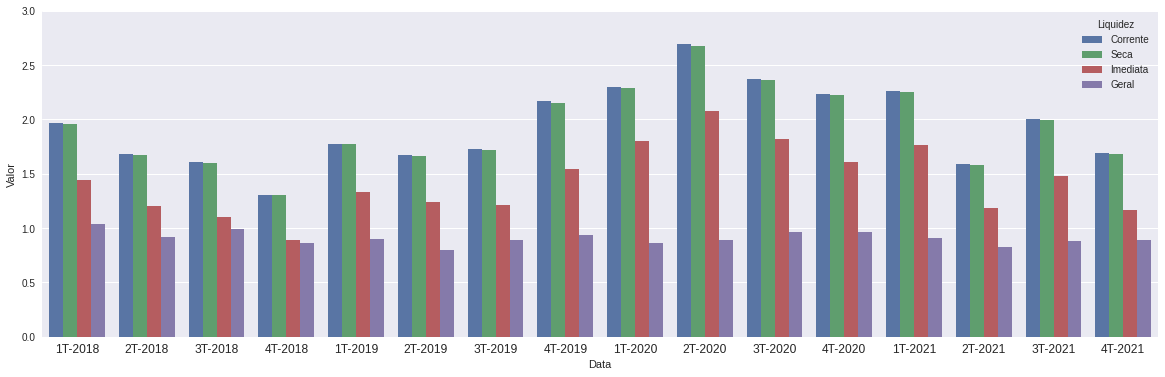

In [38]:
liquidez_setorial = liquidez_setorial['2018-01-01':]
tidy = pd.melt(liquidez_setorial.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

In [39]:
liquidez_prepandemia = liquidez_setorial[:'2020-01-01']
liquidez_pandemia = liquidez_setorial['2020-01-01':]

for liq in liquidez_setorial.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

Corrente
T Test
statistic=-2.575968369626747, pvalue=0.02198093072825053
Significante a 5.0%
Significante a 10.0%

H Test
statistic=4.411764705882355, pvalue=0.0356919001168044
Significante a 5.0%
Significante a 10.0%

Seca
T Test
statistic=-2.5861364590742433, pvalue=0.021550769817267057
Significante a 5.0%
Significante a 10.0%

H Test
statistic=4.411764705882355, pvalue=0.0356919001168044
Significante a 5.0%
Significante a 10.0%

Imediata
T Test
statistic=-2.7428490754823334, pvalue=0.015866162430266232
Significante a 5.0%
Significante a 10.0%

H Test
statistic=3.981617647058826, pvalue=0.045999366875037154
Significante a 5.0%
Significante a 10.0%

Geral
T Test
statistic=0.6330828563731374, pvalue=0.5368844153163977

H Test
statistic=0.2757352941176521, pvalue=0.5995101785599999



### Análise da principal empresa do setor: B3 S.A.

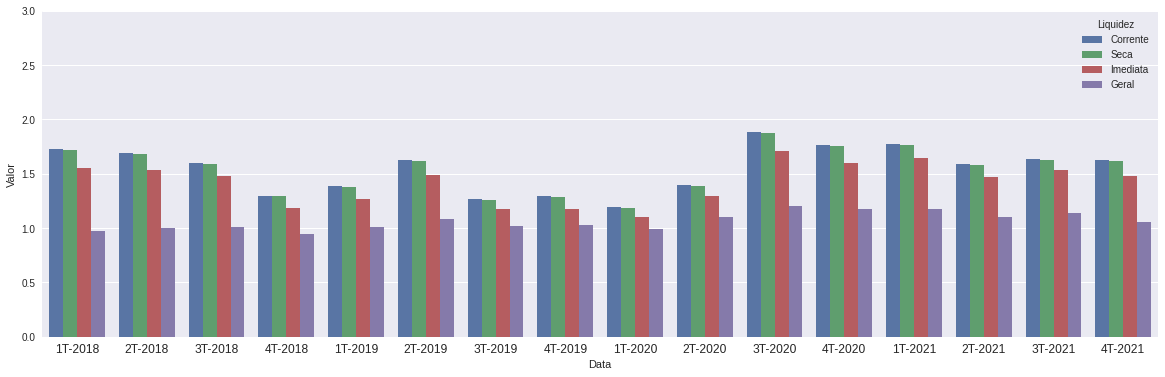

Corrente
T Test
statistic=-1.1663462427595004, pvalue=0.2629593682770342

H Test
statistic=1.588235294117652, pvalue=0.2075784423356198

Seca
T Test
statistic=-1.1559742996156066, pvalue=0.26703844659943143

H Test
statistic=1.588235294117652, pvalue=0.2075784423356198

Imediata
T Test
statistic=-1.2851485880960014, pvalue=0.21959505407282037

H Test
statistic=1.102941176470594, pvalue=0.2936215439289016

Geral
T Test
statistic=-3.8346030602924865, pvalue=0.0018220366607434077
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=6.893382352941181, pvalue=0.008651541533947503
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%



In [40]:
liq_rumo = liquidez_empresas[21610]
liq_rumo = liq_rumo['2018-01-01':]
tidy_rumo = pd.melt(liq_rumo.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy_rumo.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy_rumo, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

liquidez_prepandemia = liq_rumo[:'2020-01-01']
liquidez_pandemia = liq_rumo['2020-01-01':]

for liq in liq_rumo.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

## Materiais Básicos

In [41]:
setor = setores['Materiais Básicos']
setor

,Denominação Social,Código CVM,Ticker,Capital R$,Peso Capital Social
0,VALE S.A.,4170,VALE3.SA,7.730000e+10,0.838394
1,SUZANO S.A.,13986,SUZB3.SA,9.269281e+09,0.100534
2,DEXCO S.A.,21091,DXCO3.SA,2.370189e+09,0.025707
3,PARANAPANEMA S.A.,9393,PMAM3.SA,2.069566e+09,0.022446
4,FERTILIZANTES HERINGER S.A.,20621,FHER3.SA,5.941649e+08,0.006444
5,IRANI PAPEL E EMBALAGEM S.A.,2429,RANI3.SA,5.668948e+08,0.006149
6,MMX MINERACAO E METALICOS S.A.,17914,MMXM3.SA,3.000000e+07,0.000325


In [42]:
liquidez_empresas = {}
erros = []
for cd_cvm in setor['Código CVM'].to_list():
    try:
        empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
        empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
        liquidez = empresa.groupby('DT_REFER').apply(calcula_liquidez)
        if cd_cvm==24228:
            liquidez.index = pd.Series(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', name='DT_REFER')
        liquidez_empresas[cd_cvm] = liquidez
    except:
        liquidez_empresas[cd_cvm] = pd.DataFrame()
        erros.append(cd_cvm)

In [43]:
liquidez_setorial = pd.DataFrame()
for cd_cvm, liquidez in liquidez_empresas.items():
    peso = setor[setor['Código CVM']==cd_cvm]['Peso Capital Social'].reset_index(drop=True)
    peso = peso[0]
    liquidez_setorial = liquidez_setorial.add(peso * liquidez, fill_value=0)
    
liquidez_setorial

,Corrente,Seca,Imediata,Geral
DT_REFER,,,,
2017-03-31,1.930840,1.607382,0.635458,0.833166
2017-06-30,1.864037,1.492394,0.577553,0.806421
2017-09-30,1.902124,1.491306,0.507951,0.839532
2017-12-31,1.495987,1.171747,0.376310,0.791996
2018-03-31,1.640358,1.218384,0.583791,0.785471
2018-06-30,1.842468,1.393444,0.801565,0.847845
2018-09-30,1.813550,1.380130,0.811142,0.853408
2018-12-31,1.994597,1.526502,0.971189,0.903924
2019-03-31,1.245050,0.818519,0.397389,0.753245


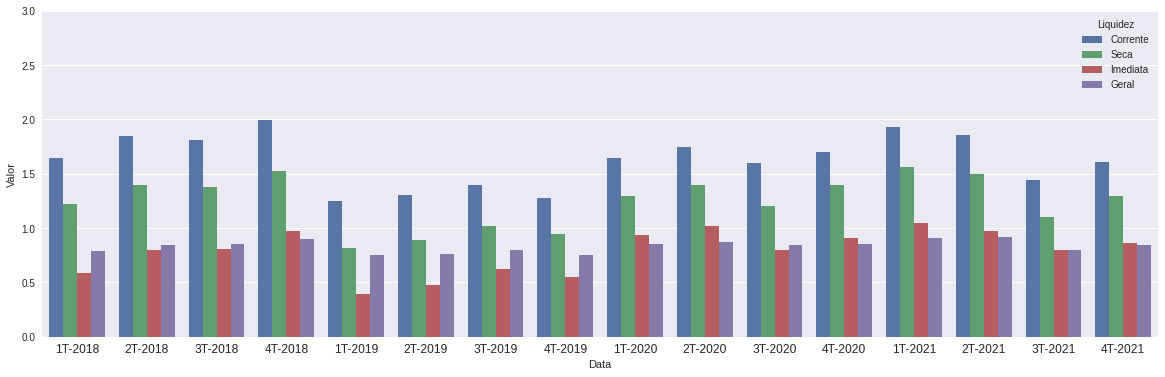

In [44]:
liquidez_setorial = liquidez_setorial['2018-01-01':]
tidy = pd.melt(liquidez_setorial.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

In [45]:
liquidez_prepandemia = liquidez_setorial[:'2020-01-01']
liquidez_pandemia = liquidez_setorial['2020-01-01':]

for liq in liquidez_setorial.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

Corrente
T Test
statistic=-1.0599985507448155, pvalue=0.3070910439559493

H Test
statistic=0.8933823529411811, pvalue=0.3445623653256964

Seca
T Test
statistic=-1.8041961918967342, pvalue=0.0927523705042251
Significante a 10.0%

H Test
statistic=2.481617647058826, pvalue=0.11518373151505139

Imediata
T Test
statistic=-3.5008188610721342, pvalue=0.0035294598450749427
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=5.834558823529413, pvalue=0.0157143497722189
Significante a 5.0%
Significante a 10.0%

Geral
T Test
statistic=-2.3184433778209446, pvalue=0.03606543536501035
Significante a 5.0%
Significante a 10.0%

H Test
statistic=3.981617647058826, pvalue=0.045999366875037154
Significante a 5.0%
Significante a 10.0%



### Análise da principal empresa so setor: VALE S.A.

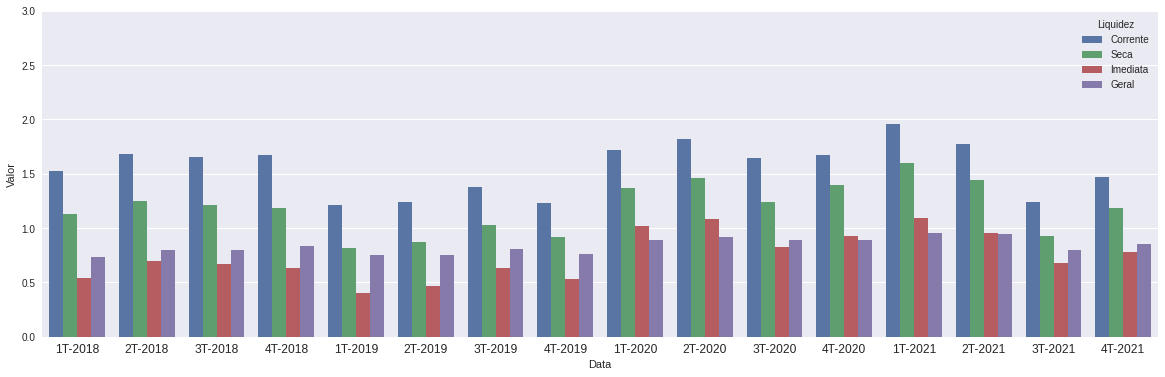

Corrente
T Test
statistic=-2.0034148219845735, pvalue=0.06488268682678261
Significante a 10.0%

H Test
statistic=3.981617647058826, pvalue=0.045999366875037154
Significante a 5.0%
Significante a 10.0%

Seca
T Test
statistic=-2.938638405112689, pvalue=0.01078569441173874
Significante a 5.0%
Significante a 10.0%

H Test
statistic=5.834558823529413, pvalue=0.0157143497722189
Significante a 5.0%
Significante a 10.0%

Imediata
T Test
statistic=-5.473230094234844, pvalue=8.20700229331913e-05
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=10.599264705882355, pvalue=0.0011313264268228347
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Geral
T Test
statistic=-5.081714793936897, pvalue=0.00016723545743816182
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=8.647058823529413, pvalue=0.0032758974829085945
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%



In [46]:
liq_rumo = liquidez_empresas[4170]
liq_rumo = liq_rumo['2018-01-01':]
tidy_rumo = pd.melt(liq_rumo.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy_rumo.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy_rumo, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

liquidez_prepandemia = liq_rumo[:'2020-01-01']
liquidez_pandemia = liq_rumo['2020-01-01':]

for liq in liq_rumo.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

## Petróleo, Gás e Biocombustíveis

In [47]:
setor = setores['Petróleo. Gás e Biocombustíveis']
setor

,Denominação Social,Código CVM,Ticker,Capital R$,Peso Capital Social
0,COSAN S.A.,19836,CSAN3.SA,8.402544e+09,0.362405
1,PETRO RIO S.A.,22187,PRIO3.SA,5.543048e+09,0.239074
2,ULTRAPAR PARTICIPACOES S.A.,18465,UGPA3.SA,5.171752e+09,0.223059
3,ENAUTA PARTICIPAÇÕES S.A.,22365,ENAT3.SA,2.135496e+09,0.092105
4,LUPATECH S.A.,20060,LUPA3.SA,1.897431e+09,0.081837
5,OSX BRASIL S.A.,21342,OSXB3.SA,3.526360e+07,0.001521


In [48]:
liquidez_empresas = {}
erros = []
for cd_cvm in setor['Código CVM'].to_list():
    try:
        empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
        empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
        liquidez = empresa.groupby('DT_REFER').apply(calcula_liquidez)
        if cd_cvm==24228:
            liquidez.index = pd.Series(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', name='DT_REFER')
        liquidez_empresas[cd_cvm] = liquidez
    except:
        liquidez_empresas[cd_cvm] = pd.DataFrame()
        erros.append(cd_cvm)

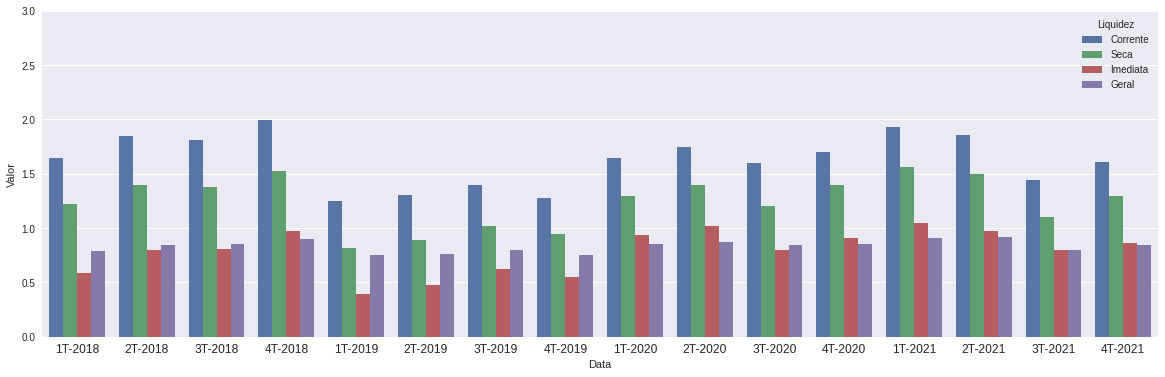

In [49]:
liquidez_setorial = liquidez_setorial['2018-01-01':]
tidy = pd.melt(liquidez_setorial.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

In [50]:
liquidez_prepandemia = liquidez_setorial[:'2020-01-01']
liquidez_pandemia = liquidez_setorial['2020-01-01':]

for liq in liquidez_setorial.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

Corrente
T Test
statistic=-1.0599985507448155, pvalue=0.3070910439559493

H Test
statistic=0.8933823529411811, pvalue=0.3445623653256964

Seca
T Test
statistic=-1.8041961918967342, pvalue=0.0927523705042251
Significante a 10.0%

H Test
statistic=2.481617647058826, pvalue=0.11518373151505139

Imediata
T Test
statistic=-3.5008188610721342, pvalue=0.0035294598450749427
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=5.834558823529413, pvalue=0.0157143497722189
Significante a 5.0%
Significante a 10.0%

Geral
T Test
statistic=-2.3184433778209446, pvalue=0.03606543536501035
Significante a 5.0%
Significante a 10.0%

H Test
statistic=3.981617647058826, pvalue=0.045999366875037154
Significante a 5.0%
Significante a 10.0%



### Análise da principal empresa do setor: COSAN S.A.

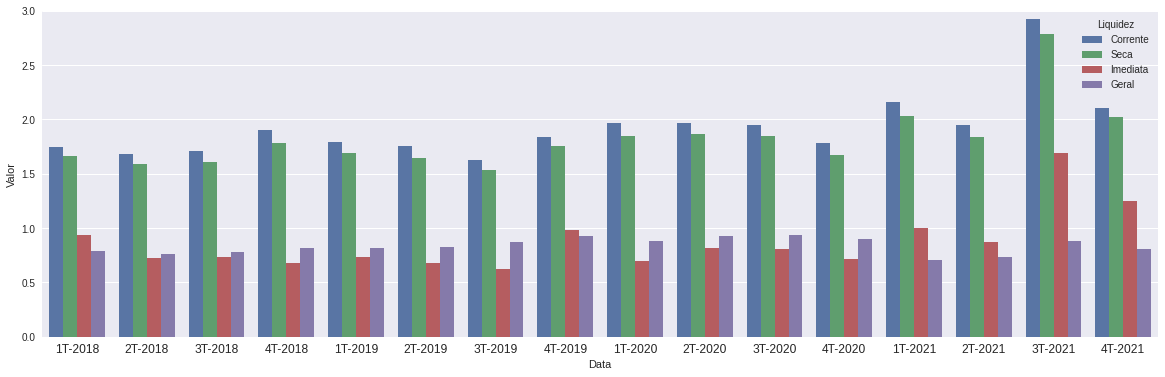

Corrente
T Test
statistic=-2.6972747583274703, pvalue=0.01734898525500188
Significante a 5.0%
Significante a 10.0%

H Test
statistic=9.275735294117652, pvalue=0.002322094515878006
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Seca
T Test
statistic=-2.652973840736246, pvalue=0.01891894172164788
Significante a 5.0%
Significante a 10.0%

H Test
statistic=9.275735294117652, pvalue=0.002322094515878006
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Imediata
T Test
statistic=-1.7133782114637088, pvalue=0.10868893618584727

H Test
statistic=2.82352941176471, pvalue=0.09289194088370446
Significante a 10.0%

Geral
T Test
statistic=-0.681465958839612, pvalue=0.5066937532986047

H Test
statistic=0.7058823529411811, pvalue=0.4008141693829329



In [51]:
liq_rumo = liquidez_empresas[19836]
liq_rumo = liq_rumo['2018-01-01':]
tidy_rumo = pd.melt(liq_rumo.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy_rumo.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy_rumo, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

liquidez_prepandemia = liq_rumo[:'2020-01-01']
liquidez_pandemia = liq_rumo['2020-01-01':]

for liq in liq_rumo.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

## Saúde

In [52]:
setor = setores['Saúde']
setor

,Denominação Social,Código CVM,Ticker,Capital R$,Peso Capital Social
0,DIAGNOSTICOS DA AMERICA S.A.,19623,DASA3.SA,1.635920e+10,0.541357
1,HYPERA S.A.,21431,HYPE3.SA,4.478126e+09,0.148190
2,RAIA DROGASIL S.A.,5258,RADL3.SA,2.500000e+09,0.082730
3,FLEURY S.A.,21881,FLRY3.SA,1.460038e+09,0.048315
4,PROFARMA DISTRIB PROD FARMACEUTICOS S.A.,20346,PFRM3.SA,1.043663e+09,0.034537
5,DIMED S.A. DISTRIBUIDORA DE MEDICAMENTOS,9342,PNVL3.SA,9.430000e+08,0.031206
6,QUALICORP CONSULTORIA E CORRETORA DE SEGUROS S.A.,22497,QUAL3.SA,8.965576e+08,0.029669
7,ODONTOPREV S.A.,20125,ODPV3.SA,8.510166e+08,0.028162
8,CENTRO DE IMAGEM DIAGNOSTICOS S.A.,24058,AALR3.SA,6.353720e+08,0.021026
9,INSTITUTO HERMES PARDINI S.A.,24090,PARD3.SA,5.937765e+08,0.019649


In [53]:
liquidez_empresas = {}
erros = []
for cd_cvm in setor['Código CVM'].to_list():
    try:
        empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
        empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
        liquidez = empresa.groupby('DT_REFER').apply(calcula_liquidez)
        if cd_cvm==24228:
            liquidez.index = pd.Series(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', name='DT_REFER')
        liquidez_empresas[cd_cvm] = liquidez
    except:
        liquidez_empresas[cd_cvm] = pd.DataFrame()
        erros.append(cd_cvm)

In [54]:
liquidez_setorial = pd.DataFrame()
for cd_cvm, liquidez in liquidez_empresas.items():
    peso = setor[setor['Código CVM']==cd_cvm]['Peso Capital Social'].reset_index(drop=True)
    peso = peso[0]
    liquidez_setorial = liquidez_setorial.add(peso * liquidez, fill_value=0)
    
liquidez_setorial

,Corrente,Seca,Imediata,Geral
DT_REFER,,,,
2017-03-31,1.970693,1.690945,0.704757,1.369991
2017-06-30,1.766299,1.503029,0.634648,1.260137
2017-09-30,1.732622,1.469050,0.572656,1.228227
2017-12-31,1.430001,1.195674,0.510436,1.117736
2018-03-31,1.839127,1.531114,0.599909,1.280831
2018-06-30,1.786330,1.486831,0.586128,1.285547
2018-09-30,1.752292,1.473438,0.570895,1.263694
2018-12-31,1.832992,1.561996,0.726508,1.237298
2019-03-31,1.814391,1.498681,0.583234,1.101788


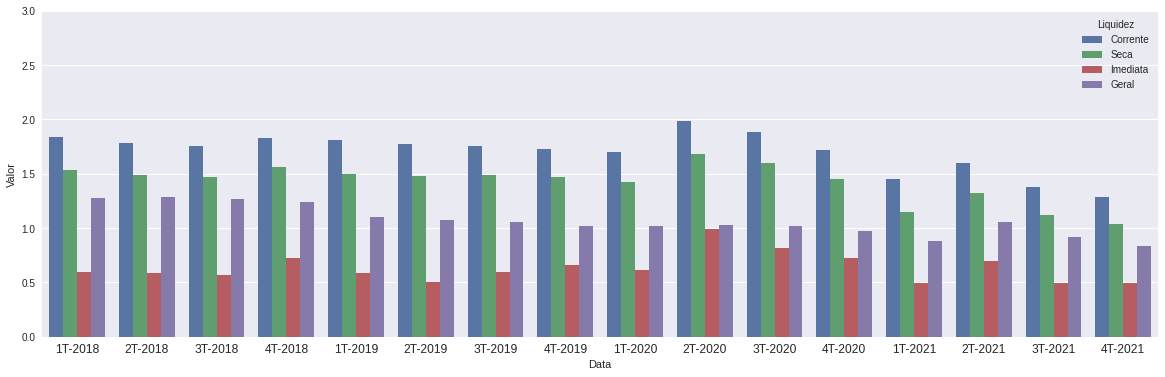

In [55]:
liquidez_setorial = liquidez_setorial['2018-01-01':]
tidy = pd.melt(liquidez_setorial.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

In [56]:
liquidez_prepandemia = liquidez_setorial[:'2020-01-01']
liquidez_pandemia = liquidez_setorial['2020-01-01':]

for liq in liquidez_setorial.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

Corrente
T Test
statistic=1.8439379404267573, pvalue=0.0864574852327415
Significante a 10.0%

H Test
statistic=2.82352941176471, pvalue=0.09289194088370446
Significante a 10.0%

Seca
T Test
statistic=1.8234925920183744, pvalue=0.08964657680175998
Significante a 10.0%

H Test
statistic=2.82352941176471, pvalue=0.09289194088370446
Significante a 10.0%

Imediata
T Test
statistic=-0.947604958078732, pvalue=0.35940133326598056

H Test
statistic=0.17647058823529704, pvalue=0.6744240722352912

Geral
T Test
statistic=4.053091489703268, pvalue=0.0011860559706810398
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=9.275735294117652, pvalue=0.002322094515878006
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%



### Análise da principal empresa do setor: DIAGNOSTICOS DA AMERICA S.A.

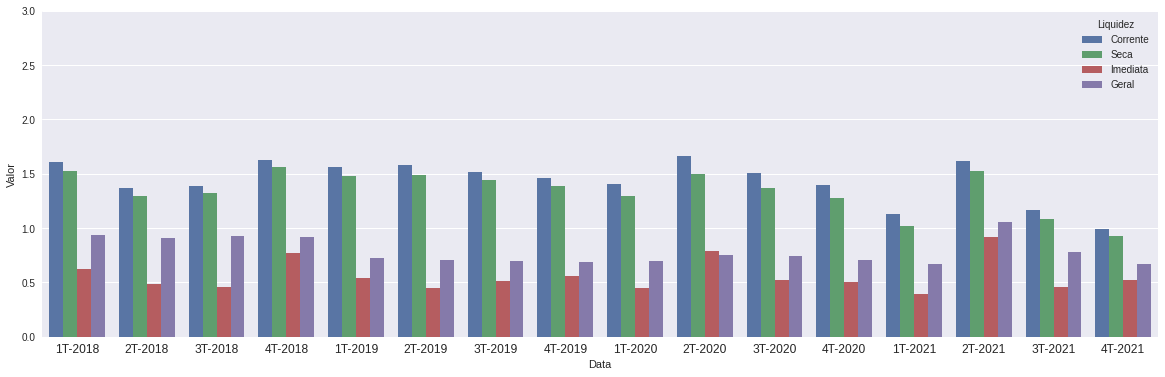

Corrente
T Test
statistic=1.6931214122637184, pvalue=0.11255599276893256

H Test
statistic=1.102941176470594, pvalue=0.2936215439289016

Seca
T Test
statistic=2.2516171086969106, pvalue=0.04092889766379014
Significante a 5.0%
Significante a 10.0%

H Test
statistic=3.1875, pvalue=0.07420341132975534
Significante a 10.0%

Imediata
T Test
statistic=-0.24646168415528266, pvalue=0.8089018840131854

H Test
statistic=0.17647058823529704, pvalue=0.6744240722352912

Geral
T Test
statistic=0.880682190298387, pvalue=0.3933576697503558

H Test
statistic=0.8933823529411811, pvalue=0.3445623653256964



In [57]:
liq_rumo = liquidez_empresas[19623]
liq_rumo = liq_rumo['2018-01-01':]
tidy_rumo = pd.melt(liq_rumo.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy_rumo.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy_rumo, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

liquidez_prepandemia = liq_rumo[:'2020-01-01']
liquidez_pandemia = liq_rumo['2020-01-01':]

for liq in liq_rumo.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

##  Tecnologia da Informação

In [58]:
setor = setores['Tecnologia da Informação']
setor

,Denominação Social,Código CVM,Ticker,Capital R$,Peso Capital Social
0,TOTVS S.A.,19992,TOTS3.SA,2.962585e+09,0.627959
1,SINQIA S.A.,22799,SQIA3.SA,8.133033e+08,0.172390
2,POSITIVO TECNOLOGIA S.A.,20362,POSI3.SA,7.427000e+08,0.157425
3,PADTEC HOLDING S.A.,18414,PDTC3.SA,1.992113e+08,0.042225


In [59]:
liquidez_empresas = {}
erros = []
for cd_cvm in setor['Código CVM'].to_list():
    try:
        empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
        empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
        liquidez = empresa.groupby('DT_REFER').apply(calcula_liquidez)
        if cd_cvm==24228:
            liquidez.index = pd.Series(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', name='DT_REFER')
        liquidez_empresas[cd_cvm] = liquidez
    except:
        liquidez_empresas[cd_cvm] = pd.DataFrame()
        erros.append(cd_cvm)

In [60]:
liquidez_setorial = pd.DataFrame()
for cd_cvm, liquidez in liquidez_empresas.items():
    peso = setor[setor['Código CVM']==cd_cvm]['Peso Capital Social'].reset_index(drop=True)
    peso = peso[0]
    liquidez_setorial = liquidez_setorial.add(peso * liquidez, fill_value=0)
    
liquidez_setorial

,Corrente,Seca,Imediata,Geral
DT_REFER,,,,
2017-03-31,2.702489,2.598986,1.627371,1.153586
2017-06-30,1.457970,1.344349,0.417036,1.183353
2017-09-30,1.512488,1.394483,0.524833,1.198156
2017-12-31,1.533751,1.414938,0.601546,1.209846
2018-03-31,1.519824,1.391583,0.546438,1.221795
2018-06-30,1.647199,1.528308,0.612374,1.286662
2018-09-30,1.457751,1.341776,0.569677,1.240132
2018-12-31,1.423712,1.310846,0.622628,1.220247
2019-03-31,1.416543,1.333563,0.567858,1.096469


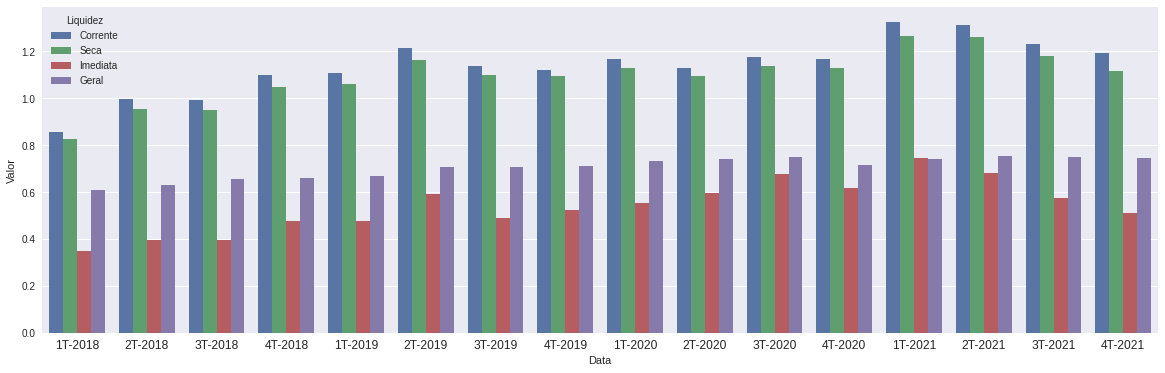

In [70]:
liquidez_setorial = liquidez_setorial['2018-01-01':]
tidy = pd.melt(liquidez_setorial.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
#ax.set_ylim([0, 3.0])

plt.show()

In [62]:
liquidez_prepandemia = liquidez_setorial[:'2020-01-01']
liquidez_pandemia = liquidez_setorial['2020-01-01':]

for liq in liquidez_setorial.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

Corrente
T Test
statistic=-0.24867129999213544, pvalue=0.8072258618181483

H Test
statistic=0.5404411764705941, pvalue=0.4622499461255404

Seca
T Test
statistic=-0.199774728733422, pvalue=0.8445294190683954

H Test
statistic=0.2757352941176521, pvalue=0.5995101785599999

Imediata
T Test
statistic=-0.369304239190647, pvalue=0.7174267313526743

H Test
statistic=0.8933823529411811, pvalue=0.3445623653256964

Geral
T Test
statistic=-0.08901341446174324, pvalue=0.9303320886182163

H Test
statistic=0.17647058823529704, pvalue=0.6744240722352912



In [63]:
liquidez_prepandemia.describe()

,Corrente,Seca,Imediata,Geral
count,8.000000,8.000000,8.000000,8.000000
mean,2.080049,1.981180,1.227701,1.565395
std,0.859480,0.876835,0.950074,0.513727
min,1.416543,1.310846,0.546438,1.096469
25%,1.449241,1.339723,0.569222,1.221408
50%,1.583512,1.459945,0.617501,1.263397
75%,2.680234,2.600272,1.843284,1.934809
max,3.372198,3.291470,2.684252,2.348928


In [64]:
liquidez_pandemia.describe()

,Corrente,Seca,Imediata,Geral
count,8.000000,8.000000,8.000000,8.000000
mean,2.167088,2.052545,1.369190,1.584492
std,0.491311,0.502056,0.521176,0.322966
min,1.448755,1.316060,0.618261,1.078852
25%,1.968390,1.869746,1.142224,1.479078
50%,2.162348,2.036710,1.362109,1.558244
75%,2.251745,2.146108,1.531505,1.647264
max,3.112687,3.035704,2.354602,2.241419


##  Utilidade Pública

In [65]:
setor = setores['Utilidade Pública']
setor

,Denominação Social,Código CVM,Ticker,Capital R$,Peso Capital Social
0,CIA SANEAMENTO BASICO EST SAO PAULO,14443,SBSP3.SA,1.500000e+10,0.243237
1,CPFL ENERGIA S.A.,18660,CPFE3.SA,9.435626e+09,0.153006
2,ENEVA S.A,21237,ENEV3.SA,9.044992e+09,0.146672
3,EQUATORIAL ENERGIA S.A.,20010,EQTL3.SA,8.906721e+09,0.144429
4,EDP - ENERGIAS DO BRASIL S.A.,19763,ENBR3.SA,5.502716e+09,0.089231
5,LIGHT S.A.,19879,LIGT3.SA,5.473247e+09,0.088753
6,ENGIE BRASIL ENERGIA S.A.,17329,EGIE3.SA,4.902648e+09,0.079500
7,CIA SANEAMENTO DE MINAS GERAIS-COPASA MG,19445,CSMG3.SA,3.402386e+09,0.055172


In [66]:
liquidez_empresas = {}
erros = []
for cd_cvm in setor['Código CVM'].to_list():
    try:
        empresa = dfcs[dfcs['CD_CVM']==cd_cvm].reset_index(drop=True)
        empresa = empresa[empresa['CD_CONTA'].apply(lambda x: len(x) <= 10)]
        liquidez = empresa.groupby('DT_REFER').apply(calcula_liquidez)
        if cd_cvm==24228:
            liquidez.index = pd.Series(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', name='DT_REFER')
        liquidez_empresas[cd_cvm] = liquidez
    except:
        liquidez_empresas[cd_cvm] = pd.DataFrame()
        erros.append(cd_cvm)

In [67]:
liquidez_setorial = pd.DataFrame()
for cd_cvm, liquidez in liquidez_empresas.items():
    peso = setor[setor['Código CVM']==cd_cvm]['Peso Capital Social'].reset_index(drop=True)
    peso = peso[0]
    liquidez_setorial = liquidez_setorial.add(peso * liquidez, fill_value=0)
    
liquidez_setorial

,Corrente,Seca,Imediata,Geral
DT_REFER,,,,
2017-03-31,1.028472,0.978988,0.466024,0.610432
2017-06-30,0.928020,0.888418,0.397471,0.588120
2017-09-30,0.843104,0.813222,0.317243,0.591608
2017-12-31,0.935008,0.903613,0.401790,0.629461
2018-03-31,0.857326,0.826799,0.349402,0.608774
2018-06-30,0.993881,0.954601,0.394140,0.628633
2018-09-30,0.989555,0.951056,0.394938,0.653099
2018-12-31,1.099197,1.045762,0.478149,0.658843
2019-03-31,1.106703,1.059680,0.478117,0.669277


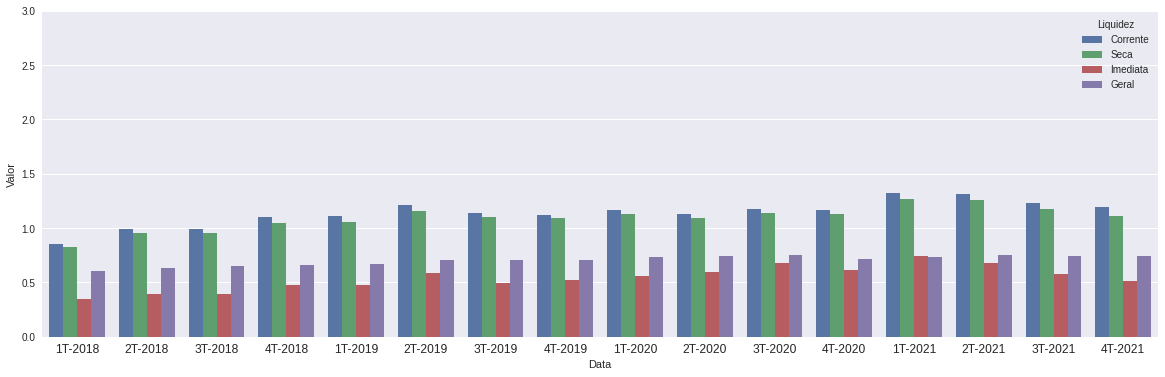

In [68]:
liquidez_setorial = liquidez_setorial['2018-01-01':]
tidy = pd.melt(liquidez_setorial.reset_index(), id_vars='DT_REFER', value_vars=['Corrente', 'Seca', 'Imediata', 'Geral'])
tidy.columns=['Data', 'Liquidez', 'Valor']

fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=tidy, x='Data', y='Valor', hue='Liquidez', ax=ax)

ax.set_xticklabels([f'{i}T-{ano}' for ano in range(2018,2022) for i in range(1,5)], fontsize=12)
ax.set_ylim([0, 3.0])

plt.show()

In [69]:
liquidez_prepandemia = liquidez_setorial[:'2020-01-01']
liquidez_pandemia = liquidez_setorial['2020-01-01':]

for liq in liquidez_setorial.columns:
    print(liq)
    group1, group2 = liquidez_prepandemia[liq].to_numpy(), liquidez_pandemia[liq].to_numpy()
    ttest= stats.ttest_ind(a=group1, b=group2, equal_var=True)
    htest = stats.kruskal(group1, group2)
    print('T Test')
    print(f'statistic={ttest.statistic}, pvalue={ttest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if ttest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
            
    print('\nH Test')
    print(f'statistic={htest.statistic}, pvalue={htest.pvalue}')
    for alpha in [0.01, 0.05, 0.1]:
        if htest.pvalue < alpha:
            print(f'Significante a {100 * alpha}%')
            
    print()

Corrente
T Test
statistic=-3.184223769848564, pvalue=0.006625166704801002
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=7.455882352941181, pvalue=0.006322947695810918
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Seca
T Test
statistic=-3.1388698567495625, pvalue=0.007250268690669774
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=6.893382352941181, pvalue=0.008651541533947503
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Imediata
T Test
statistic=-4.056285955951313, pvalue=0.0011786656677129164
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=8.647058823529413, pvalue=0.0032758974829085945
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

Geral
T Test
statistic=-5.085676185291893, pvalue=0.0001660184821914765
Significante a 1.0%
Significante a 5.0%
Significante a 10.0%

H Test
statistic=11.294117647058826, pvalue=0.000777530446940383
Significante a 1

In [74]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DT_REFER  16 non-null     datetime64[ns]
 1   Corrente  16 non-null     float64       
 2   Seca      16 non-null     float64       
 3   Imediata  16 non-null     float64       
 4   Geral     16 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 768.0 bytes


In [93]:
teste = liquidez_setorial.reset_index()
teste
teste['Trimestre'] = teste['DT_REFER'].dt.quarter
teste.set_index('Trimestre', inplace=True)
teste.drop(columns=['DT_REFER'], inplace=True)

teste

,Corrente,Seca,Imediata,Geral
Trimestre,,,,
1,0.857326,0.826799,0.349402,0.608774
2,0.993881,0.954601,0.394140,0.628633
3,0.989555,0.951056,0.394938,0.653099
4,1.099197,1.045762,0.478149,0.658843
1,1.106703,1.059680,0.478117,0.669277
2,1.211113,1.161320,0.589710,0.707879
3,1.137174,1.097402,0.490294,0.706784
4,1.117913,1.094021,0.522291,0.708787
1,1.168211,1.129658,0.554771,0.730027


In [97]:
teste = liquidez_setorial

In [100]:
teste.index = pd.PeriodIndex(teste.index, freq='Q')
teste

,Corrente,Seca,Imediata,Geral
DT_REFER,,,,
2018Q1,0.857326,0.826799,0.349402,0.608774
2018Q2,0.993881,0.954601,0.394140,0.628633
2018Q3,0.989555,0.951056,0.394938,0.653099
2018Q4,1.099197,1.045762,0.478149,0.658843
2019Q1,1.106703,1.059680,0.478117,0.669277
2019Q2,1.211113,1.161320,0.589710,0.707879
2019Q3,1.137174,1.097402,0.490294,0.706784
2019Q4,1.117913,1.094021,0.522291,0.708787
2020Q1,1.168211,1.129658,0.554771,0.730027
